### Random Forrest

In [2]:
#Reference
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [3]:
import pandas as pd
import numpy as np
from IPython.display import Image

In [4]:
df=pd.read_csv('df_vars_modeling_dpto_final_updated.csv')
df

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),...,hurtos_x_10000_hab,homicidios,homicidios_x_10000_hab,violencia_intrafamiliar,violencia_intrafamiliar_x_10000_hab,mdm,conectividad,transformacion,inversion_total,vacunacion_pentavalente_0_1_mean
0,2016,5,5000,0.535800,0.692200,14.200000,1.928453e+07,137.67000,7413.780000,2826.540000,...,12.871520,15.016000,4.406800,38.976000,6.016000,53.424320,27992171911,52829438440,80821610351,0.927392
1,2016,8,8000,0.436800,0.698500,4.580000,1.549513e+07,110.62000,375.660000,110.230000,...,9.304783,24.608696,0.940870,104.000000,3.972174,43.680435,8695209114,28774131776,37469340890,0.975304
2,2016,11,11001,0.412800,0.532400,1.800938,1.357851e+07,96.93375,1782.839375,1269.656563,...,43.060000,1278.000000,1.600000,4738.000000,5.940000,77.560000,4591990672,44654525711,49246516383,0.956000
3,2016,13,13000,0.388700,0.647800,2.140000,1.457045e+07,104.02000,1370.430000,704.020000,...,2.797609,8.934783,1.270217,18.239130,2.694348,38.773043,19951902097,27358797289,47310699386,0.790543
4,2016,15,15000,0.495300,0.676300,1.280000,1.852046e+07,132.21000,2639.780000,1694.060000,...,11.426911,0.869919,0.935528,25.642276,13.514228,49.328537,17516978034,6708924973,24225903007,0.886130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2019,91,91000,0.305530,0.636270,NaN,NaN,NaN,NaN,NaN,...,52.359497,4.000000,1.215633,67.000000,21.257215,30.873500,0,177484873,177484873,0.928500
128,2019,94,94000,0.480100,0.549040,NaN,NaN,NaN,NaN,NaN,...,65.191442,3.000000,0.918189,89.000000,27.239617,46.020164,534281300,7108304,541389604,1.000000
129,2019,95,95000,0.503210,0.592438,NaN,NaN,NaN,NaN,NaN,...,17.101595,8.500000,4.593769,37.250000,10.793312,50.933432,534281300,762671702,1296953002,0.907500
130,2019,97,97000,0.496997,0.525490,NaN,NaN,NaN,NaN,NaN,...,11.340422,1.333333,1.410219,30.333333,27.290174,45.854152,534281300,171584563,705865863,0.731333


In [5]:
#Thousands of millions
#Columns Conectividad, 

In [6]:
df['conectividad']=df['conectividad'].div(1000000)
df['transformacion']=df['transformacion'].div(1000000)
df['inversion_total']=df['inversion_total'].div(1000000)


In [7]:
#Drop NA

In [8]:
df=df.dropna()
df

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),...,hurtos_x_10000_hab,homicidios,homicidios_x_10000_hab,violencia_intrafamiliar,violencia_intrafamiliar_x_10000_hab,mdm,conectividad,transformacion,inversion_total,vacunacion_pentavalente_0_1_mean
0,2016,5,5000,0.5358,0.6922,14.200000,1.928453e+07,137.67000,7413.780000,2826.540000,...,12.871520,15.016000,4.406800,38.976000,6.016000,53.424320,27992.171911,52829.438440,80821.610351,0.927392
1,2016,8,8000,0.4368,0.6985,4.580000,1.549513e+07,110.62000,375.660000,110.230000,...,9.304783,24.608696,0.940870,104.000000,3.972174,43.680435,8695.209114,28774.131776,37469.340890,0.975304
2,2016,11,11001,0.4128,0.5324,1.800938,1.357851e+07,96.93375,1782.839375,1269.656563,...,43.060000,1278.000000,1.600000,4738.000000,5.940000,77.560000,4591.990672,44654.525711,49246.516383,0.956000
3,2016,13,13000,0.3887,0.6478,2.140000,1.457045e+07,104.02000,1370.430000,704.020000,...,2.797609,8.934783,1.270217,18.239130,2.694348,38.773043,19951.902097,27358.797289,47310.699386,0.790543
4,2016,15,15000,0.4953,0.6763,1.280000,1.852046e+07,132.21000,2639.780000,1694.060000,...,11.426911,0.869919,0.935528,25.642276,13.514228,49.328537,17516.978034,6708.924973,24225.903007,0.886130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2018,91,91000,0.3665,0.6194,0.030000,9.485223e+06,60.29000,120.710000,1.270000,...,45.515000,4.000000,1.415000,70.500000,30.735000,36.442402,16030.667171,372.966581,16403.633752,0.805000
95,2018,94,94000,0.5368,0.6160,0.010000,8.069586e+06,51.29000,29.400000,21.620000,...,77.790000,3.000000,1.480000,64.000000,31.510000,52.265714,0.000000,153.614884,153.614884,1.000000
96,2018,95,95000,0.4280,0.5732,0.040000,6.716678e+06,42.69000,157.340000,2.640000,...,13.577500,6.500000,2.502500,38.750000,10.130000,43.174340,13262.151892,327.706027,13589.857919,0.952500
97,2018,97,97000,0.3905,0.6546,0.010000,6.216212e+06,39.51000,19.060000,0.890000,...,24.073333,1.000000,0.306667,25.333333,18.000000,39.975885,5304.860757,60.923959,5365.784716,0.833333


In [10]:
max=df['promedio_del_componente_de_resultados_por_departamento_y_nacion'].max()
min=df['promedio_del_componente_de_resultados_por_departamento_y_nacion'].min()
print(df['promedio_del_componente_de_resultados_por_departamento_y_nacion'].max())
print(df['promedio_del_componente_de_resultados_por_departamento_y_nacion'].min())

#(max - min) / 5
#0.0044278


0.7256999999999999
0.5043


In [11]:
#PREPARE RANDON FORREST MODEL
#LIKERT SCALE
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion >= min) & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.548578) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=1
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.548578)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.592856) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=2
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.592856)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.637134) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=3
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.637134)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= 0.681412) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=4
df.loc[(df.promedio_del_componente_de_resultados_por_departamento_y_nacion > 0.681412)  & (df.promedio_del_componente_de_resultados_por_departamento_y_nacion <= max) ,'promedio_del_componente_de_resultados_por_departamento_y_nacion']=5
df
# UPDATE MDM TO LIKER SCALE
# 30 to 40  -->  1 LOW -
# >40 to 50 -->  2 LOW  
# >50 to 60 -->  3 MID
# >60 to 70 -->  4 HIGH 
# >70 to 80 -->  5 HIGH +

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),...,hurtos_x_10000_hab,homicidios,homicidios_x_10000_hab,violencia_intrafamiliar,violencia_intrafamiliar_x_10000_hab,mdm,conectividad,transformacion,inversion_total,vacunacion_pentavalente_0_1_mean
0,2016,5,5000,0.5358,5.0,14.200000,1.928453e+07,137.67000,7413.780000,2826.540000,...,12.871520,15.016000,4.406800,38.976000,6.016000,53.424320,27992.171911,52829.438440,80821.610351,0.927392
1,2016,8,8000,0.4368,5.0,4.580000,1.549513e+07,110.62000,375.660000,110.230000,...,9.304783,24.608696,0.940870,104.000000,3.972174,43.680435,8695.209114,28774.131776,37469.340890,0.975304
2,2016,11,11001,0.4128,1.0,1.800938,1.357851e+07,96.93375,1782.839375,1269.656563,...,43.060000,1278.000000,1.600000,4738.000000,5.940000,77.560000,4591.990672,44654.525711,49246.516383,0.956000
3,2016,13,13000,0.3887,4.0,2.140000,1.457045e+07,104.02000,1370.430000,704.020000,...,2.797609,8.934783,1.270217,18.239130,2.694348,38.773043,19951.902097,27358.797289,47310.699386,0.790543
4,2016,15,15000,0.4953,4.0,1.280000,1.852046e+07,132.21000,2639.780000,1694.060000,...,11.426911,0.869919,0.935528,25.642276,13.514228,49.328537,17516.978034,6708.924973,24225.903007,0.886130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2018,91,91000,0.3665,3.0,0.030000,9.485223e+06,60.29000,120.710000,1.270000,...,45.515000,4.000000,1.415000,70.500000,30.735000,36.442402,16030.667171,372.966581,16403.633752,0.805000
95,2018,94,94000,0.5368,3.0,0.010000,8.069586e+06,51.29000,29.400000,21.620000,...,77.790000,3.000000,1.480000,64.000000,31.510000,52.265714,0.000000,153.614884,153.614884,1.000000
96,2018,95,95000,0.4280,2.0,0.040000,6.716678e+06,42.69000,157.340000,2.640000,...,13.577500,6.500000,2.502500,38.750000,10.130000,43.174340,13262.151892,327.706027,13589.857919,0.952500
97,2018,97,97000,0.3905,4.0,0.010000,6.216212e+06,39.51000,19.060000,0.890000,...,24.073333,1.000000,0.306667,25.333333,18.000000,39.975885,5304.860757,60.923959,5365.784716,0.833333


In [12]:
df

,anio,codigo_departamento,codigo_entidad,promedio_del_componente_de_gestion_por_departamento_y_nacion,promedio_del_componente_de_resultados_por_departamento_y_nacion,participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio),pib_per_capita,pib_per_capita_como_porcentaje_del_promedio_nacional,pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pesca_(agricultura;_ganaderia;_caza;_silvicultura_y_pesca),pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras),...,hurtos_x_10000_hab,homicidios,homicidios_x_10000_hab,violencia_intrafamiliar,violencia_intrafamiliar_x_10000_hab,mdm,conectividad,transformacion,inversion_total,vacunacion_pentavalente_0_1_mean
0,2016,5,5000,0.5358,5.0,14.200000,1.928453e+07,137.67000,7413.780000,2826.540000,...,12.871520,15.016000,4.406800,38.976000,6.016000,53.424320,27992.171911,52829.438440,80821.610351,0.927392
1,2016,8,8000,0.4368,5.0,4.580000,1.549513e+07,110.62000,375.660000,110.230000,...,9.304783,24.608696,0.940870,104.000000,3.972174,43.680435,8695.209114,28774.131776,37469.340890,0.975304
2,2016,11,11001,0.4128,1.0,1.800938,1.357851e+07,96.93375,1782.839375,1269.656563,...,43.060000,1278.000000,1.600000,4738.000000,5.940000,77.560000,4591.990672,44654.525711,49246.516383,0.956000
3,2016,13,13000,0.3887,4.0,2.140000,1.457045e+07,104.02000,1370.430000,704.020000,...,2.797609,8.934783,1.270217,18.239130,2.694348,38.773043,19951.902097,27358.797289,47310.699386,0.790543
4,2016,15,15000,0.4953,4.0,1.280000,1.852046e+07,132.21000,2639.780000,1694.060000,...,11.426911,0.869919,0.935528,25.642276,13.514228,49.328537,17516.978034,6708.924973,24225.903007,0.886130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2018,91,91000,0.3665,3.0,0.030000,9.485223e+06,60.29000,120.710000,1.270000,...,45.515000,4.000000,1.415000,70.500000,30.735000,36.442402,16030.667171,372.966581,16403.633752,0.805000
95,2018,94,94000,0.5368,3.0,0.010000,8.069586e+06,51.29000,29.400000,21.620000,...,77.790000,3.000000,1.480000,64.000000,31.510000,52.265714,0.000000,153.614884,153.614884,1.000000
96,2018,95,95000,0.4280,2.0,0.040000,6.716678e+06,42.69000,157.340000,2.640000,...,13.577500,6.500000,2.502500,38.750000,10.130000,43.174340,13262.151892,327.706027,13589.857919,0.952500
97,2018,97,97000,0.3905,4.0,0.010000,6.216212e+06,39.51000,19.060000,0.890000,...,24.073333,1.000000,0.306667,25.333333,18.000000,39.975885,5304.860757,60.923959,5365.784716,0.833333


In [14]:
# Labels are the values we want to predict
labels = np.array(df['promedio_del_componente_de_resultados_por_departamento_y_nacion'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df.drop('promedio_del_componente_de_resultados_por_departamento_y_nacion', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [15]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [16]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (74, 93)
Training Labels Shape: (74,)
Testing Features Shape: (25, 93)
Testing Labels Shape: (25,)


In [20]:
#BaseLine
#Average Max - Min
# The baseline predictions are the historical averages
#baseline_preds = test_features[:, feature_list.index('mdm')]
# Baseline errors, and display average baseline error
baseline_errors = abs(3 - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  0.96


In [21]:
#We have our goal! If we can’t beat an average error of 0.96 degrees, then we need to rethink our approach.

In [22]:
#Train Model

In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [25]:
#Make Predictions

In [26]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.43 degrees.


In [27]:
#Determine performance metrics

In [28]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 86.36 %.


In [29]:
#Visualizing a single tree

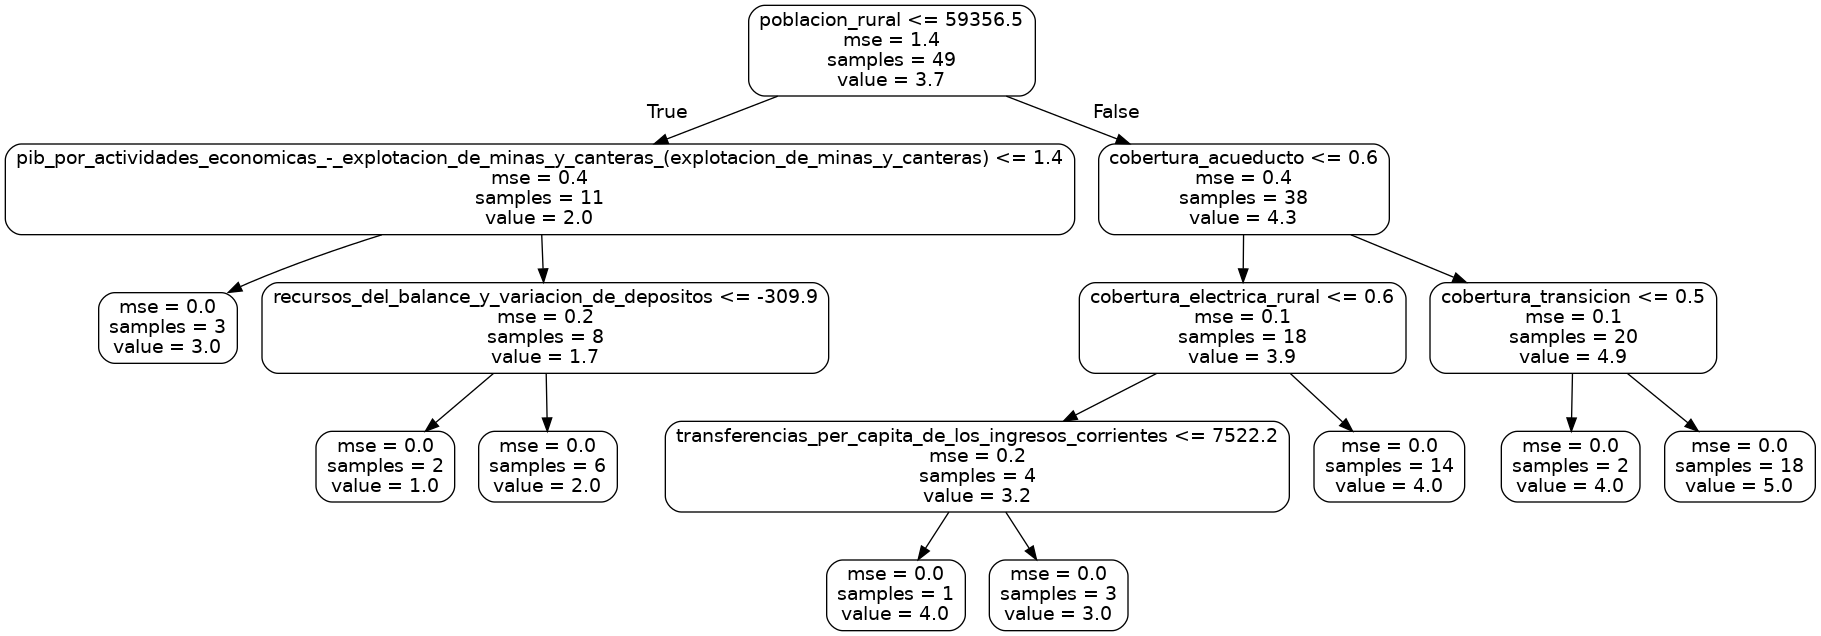

In [30]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
Image(filename='tree.png')

In [31]:
#Depth 3

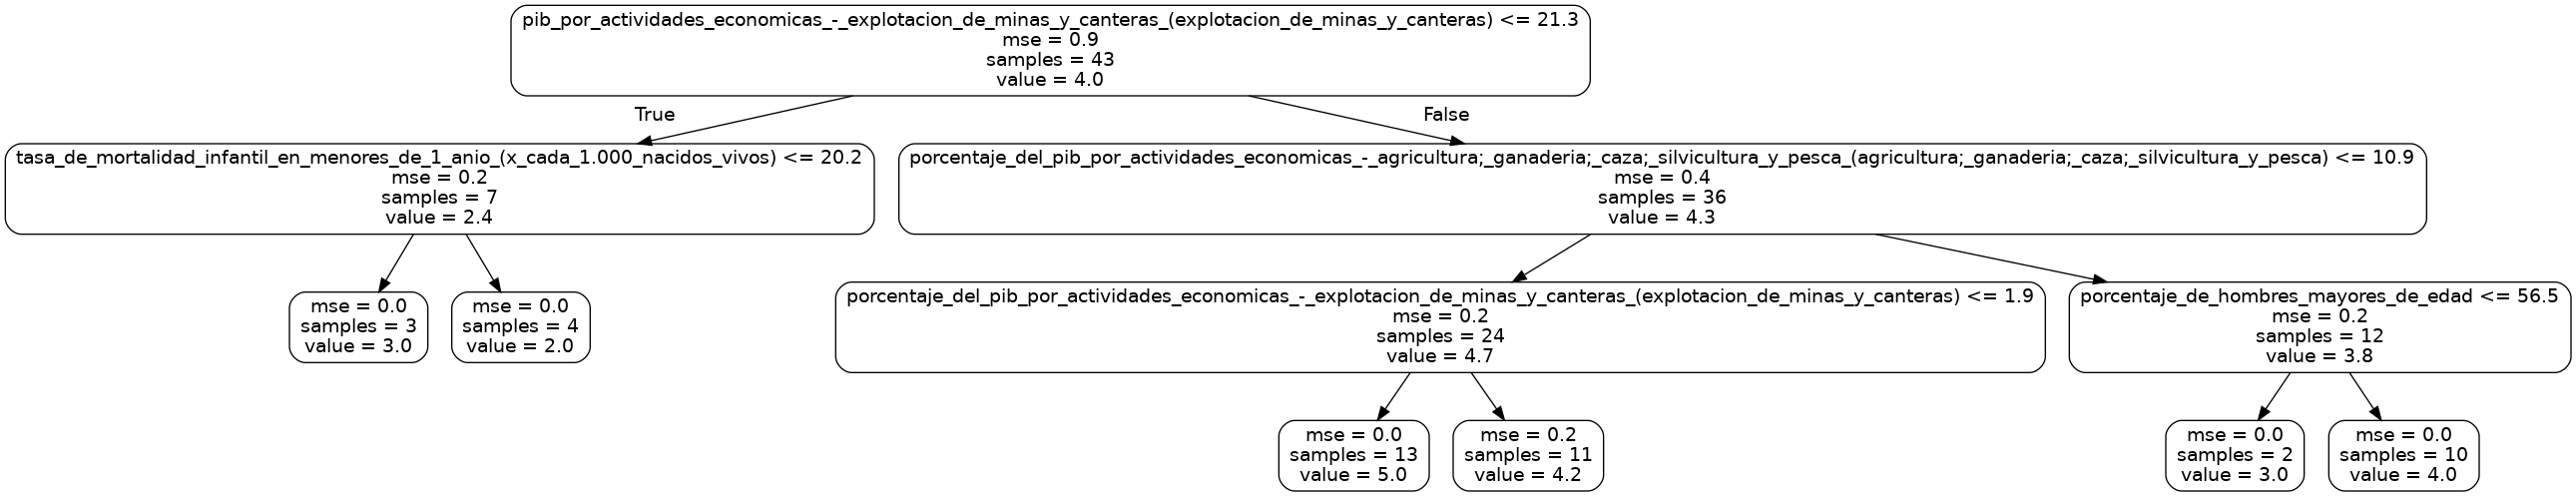

In [32]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');
Image(filename='small_tree.png')


#EVERYTIME THIS ROUTINE IS CALLED THE TREE CHANGES!!!


In [33]:
#Variable Importance

In [35]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: poblacion_rural      Importance: 0.4
Variable: pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras) Importance: 0.13
Variable: cobertura_acueducto  Importance: 0.06
Variable: tasa_de_mortalidad_(x_cada_1.000_habitantes) Importance: 0.03
Variable: densidad_poblacional Importance: 0.03
Variable: cobertura_electrica_rural Importance: 0.03
Variable: cobertura_transicion Importance: 0.02
Variable: participacion_de_las_actividades_economicas_del_pib_departamental_en_las_actividades_economicas_del_nacional_-_actividades_artisticas;_de_entrenamiento_y_otros_servicios_(actividades_artisticas;_de_entretenimiento_y_recreacion_y_otras_actividades_de_servicios;_actividades_de_los_hogares_individuales_en_calidad_de_empleadores;_actividades_no_diferenciadas_de_los_hogares_individuales_como_productores_de_bienes_y_servicios_para_uso_propio) Importance: 0.01
Variable: pib_por_actividades_economicas_-_agricultura;_ganaderia;_caza;_silvicultura_y_pe

### Only one importante Variable

In [36]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('poblacion_rural'), feature_list.index('pib_por_actividades_economicas_-_explotacion_de_minas_y_canteras_(explotacion_de_minas_y_canteras)')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.38 degrees.
Accuracy: 88.48 %.
